In [1]:
# Jupyter Notebook 셀에 입력하고 실행 (Shift+Enter)

import numpy as np
import matplotlib.pyplot as plt

# AND 게이트를 위한 훈련 데이터
# 입력 데이터 X: [x1, x2, 편향(bias)을 위한 1]
# 편향을 입력에 추가하면 코드를 더 간결하게 만들 수 있습니다.
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

# 정답(레이블) y
y = np.array([0, 0, 0, 1])

# 가중치(weights) 초기화: w1, w2, bias_weight
# -1과 1 사이의 랜덤한 값으로 시작합니다.
weights = np.random.uniform(-1, 1, 3)

# 학습률(learning rate) 설정
learning_rate = 0.1

print("초기 입력 데이터 (X):\n", X)
print("초기 정답 데이터 (y):", y)
print("초기 랜덤 가중치 (weights):", weights)

초기 입력 데이터 (X):
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
초기 정답 데이터 (y): [0 0 0 1]
초기 랜덤 가중치 (weights): [0.42827653 0.38814014 0.64367927]


In [2]:
# 계단 함수(Step Function) 정의
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [3]:
# 학습 과정을 저장할 리스트
errors = []
weights_history = []

# 학습 반복 (Epochs)
for epoch in range(100):
    error_sum = 0
    # 각 데이터 포인트에 대해 반복
    for i in range(len(X)):
        # 1. 예측값 계산
        #    - 입력과 가중치의 곱의 합 (가중합)
        weighted_sum = np.dot(X[i], weights)
        #    - 활성화 함수를 통해 최종 예측값(0 또는 1) 결정
        prediction = step_function(weighted_sum)
        
        # 2. 오차(error) 계산
        error = y[i] - prediction
        error_sum += error**2 # 오차의 제곱을 더해 전체 오차 측정
        
        # 3. 가중치 업데이트 (가장 중요한 부분!)
        #    - 오차가 0이 아니면 (즉, 예측이 틀렸으면) 가중치를 조정합니다.
        #    - 업데이트 공식: w_new = w_old + learning_rate * error * x
        weights += learning_rate * error * X[i]
        
    errors.append(error_sum)
    weights_history.append(weights.copy()) # 현재 가중치 기록
    
    # 만약 모든 데이터를 완벽하게 분류하면 학습을 조기 종료
    if error_sum == 0:
        print(f"학습 완료! (Epoch: {epoch+1})")
        break

print("\n최종 학습된 가중치:", weights)

학습 완료! (Epoch: 5)

최종 학습된 가중치: [ 0.22827653  0.08814014 -0.25632073]


입력: [0 0] -> 실제: 0, 예측: 0
입력: [0 1] -> 실제: 0, 예측: 0
입력: [1 0] -> 실제: 0, 예측: 0
입력: [1 1] -> 실제: 1, 예측: 1


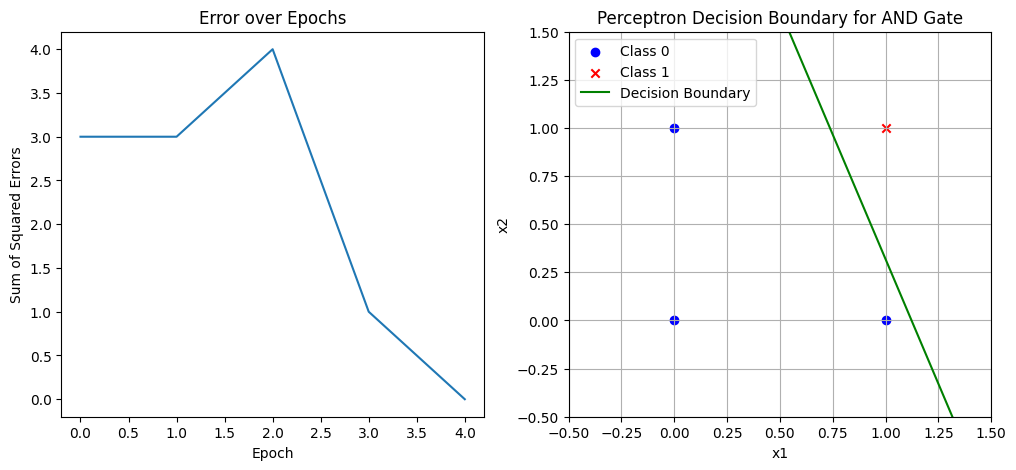

In [4]:
# 학습된 모델로 예측해보기
for i in range(len(X)):
    prediction = step_function(np.dot(X[i], weights))
    print(f"입력: {X[i, :2]} -> 실제: {y[i]}, 예측: {prediction}")

# 학습 과정 시각화 (오차 변화)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(errors)
plt.title('Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Errors')

# 결정 경계 시각화 (학습된 퍼셉트론이 어떻게 데이터를 나누는지 보여줌)
plt.subplot(1, 2, 2)
# y가 0인 데이터 포인트 (파란색 원)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='o', label='Class 0')
# y가 1인 데이터 포인트 (빨간색 엑스)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='x', label='Class 1')

# 결정 경계선 그리기
# w1*x1 + w2*x2 + b = 0  =>  x2 = (-w1*x1 - b) / w2
x1_boundary = np.linspace(-0.5, 1.5, 100)
x2_boundary = (-weights[0] * x1_boundary - weights[2]) / weights[1]

plt.plot(x1_boundary, x2_boundary, 'g-', label='Decision Boundary')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.title('Perceptron Decision Boundary for AND Gate')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()